## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## IMPORTING AND ANALYSIS THE DATASET

In [2]:
trainData = pd.read_csv('Training.csv')
testData = pd.read_csv('Testing.csv')

In [3]:
trainData = trainData.iloc[:, :-1]
train_names = list(trainData.columns)
print(train_names.pop())
print(trainData.info())
print(testData.info())

prognosis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB
None


In [4]:
print(trainData.shape)
print(testData.shape)

(4920, 133)
(42, 133)


In [5]:
trainData.isnull().sum()  #early info of the dataset

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
from collections import Counter
group_counts = Counter(trainData['prognosis'])
for item in group_counts:
    print(item ,": ", group_counts[item])

Fungal infection :  120
Allergy :  120
GERD :  120
Chronic cholestasis :  120
Drug Reaction :  120
Peptic ulcer diseae :  120
AIDS :  120
Diabetes  :  120
Gastroenteritis :  120
Bronchial Asthma :  120
Hypertension  :  120
Migraine :  120
Cervical spondylosis :  120
Paralysis (brain hemorrhage) :  120
Jaundice :  120
Malaria :  120
Chicken pox :  120
Dengue :  120
Typhoid :  120
hepatitis A :  120
Hepatitis B :  120
Hepatitis C :  120
Hepatitis D :  120
Hepatitis E :  120
Alcoholic hepatitis :  120
Tuberculosis :  120
Common Cold :  120
Pneumonia :  120
Dimorphic hemmorhoids(piles) :  120
Heart attack :  120
Varicose veins :  120
Hypothyroidism :  120
Hyperthyroidism :  120
Hypoglycemia :  120
Osteoarthristis :  120
Arthritis :  120
(vertigo) Paroymsal  Positional Vertigo :  120
Acne :  120
Urinary tract infection :  120
Psoriasis :  120
Impetigo :  120


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trainData['prognosis'] = le.fit_transform(trainData['prognosis'])
testData['prognosis'] = le.transform(testData['prognosis'])

## SPLITTING TRAINING SET AND TEST SET

In [8]:
X_train = trainData.drop(['prognosis'], axis=1)
y_train = trainData['prognosis']
X_test = testData.drop(['prognosis'], axis=1)
y_test = testData['prognosis']

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4920, 132)
(4920,)
(42, 132)
(42,)


In [10]:
print(y_test)

0     15
1      4
2     16
3      9
4     14
5     33
6      1
7     12
8     17
9      6
10    23
11    30
12     7
13    32
14    28
15    29
16     8
17    11
18    37
19    40
20    19
21    20
22    21
23    22
24     3
25    36
26    10
27    34
28    13
29    18
30    39
31    26
32    24
33    25
34    31
35     5
36     0
37     2
38    38
39    35
40    27
41    15
Name: prognosis, dtype: int32


# TRAINING MODEL

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### KNN Nearest Neighbours

In [12]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

### SVM

In [13]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train, feature_names = train_names)

### Kernel SVM

In [14]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

### Naive Bayes

In [15]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

### Decision Tree

In [16]:
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

### Random Forest

In [17]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

### XGBOOST

In [18]:
# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## PREDICTING TEST SET

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
for i in range(len(y_pred)):
    print(y_pred[i], ":  ", y_test[i])

15 :   15
4 :   4
16 :   16
9 :   9
14 :   14
33 :   33
1 :   1
12 :   12
17 :   17
6 :   6
23 :   23
30 :   30
7 :   7
32 :   32
28 :   28
29 :   29
8 :   8
11 :   11
37 :   37
40 :   40
19 :   19
20 :   20
21 :   21
22 :   22
3 :   3
36 :   36
10 :   10
34 :   34
13 :   13
18 :   18
39 :   39
26 :   26
24 :   24
25 :   25
31 :   31
5 :   5
0 :   0
2 :   2
38 :   38
35 :   35
27 :   27
15 :   15


In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [32]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
 
n_errors = (y_pred != y_test).sum() 
print(f"No of incorrect: {n_errors}")

acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(y_test, y_pred, average='micro') 
print("The precision is {}".format(prec))  #predicted fraud was actually fraud

rec = recall_score(y_test, y_pred, average='micro')         #actual fraud was predicted fraud
print("The recall is {}".format(rec)) 

f1 = f1_score(y_test, y_pred, average='micro') 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

No of incorrect: 0
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The Matthews correlation coefficient is 1.0


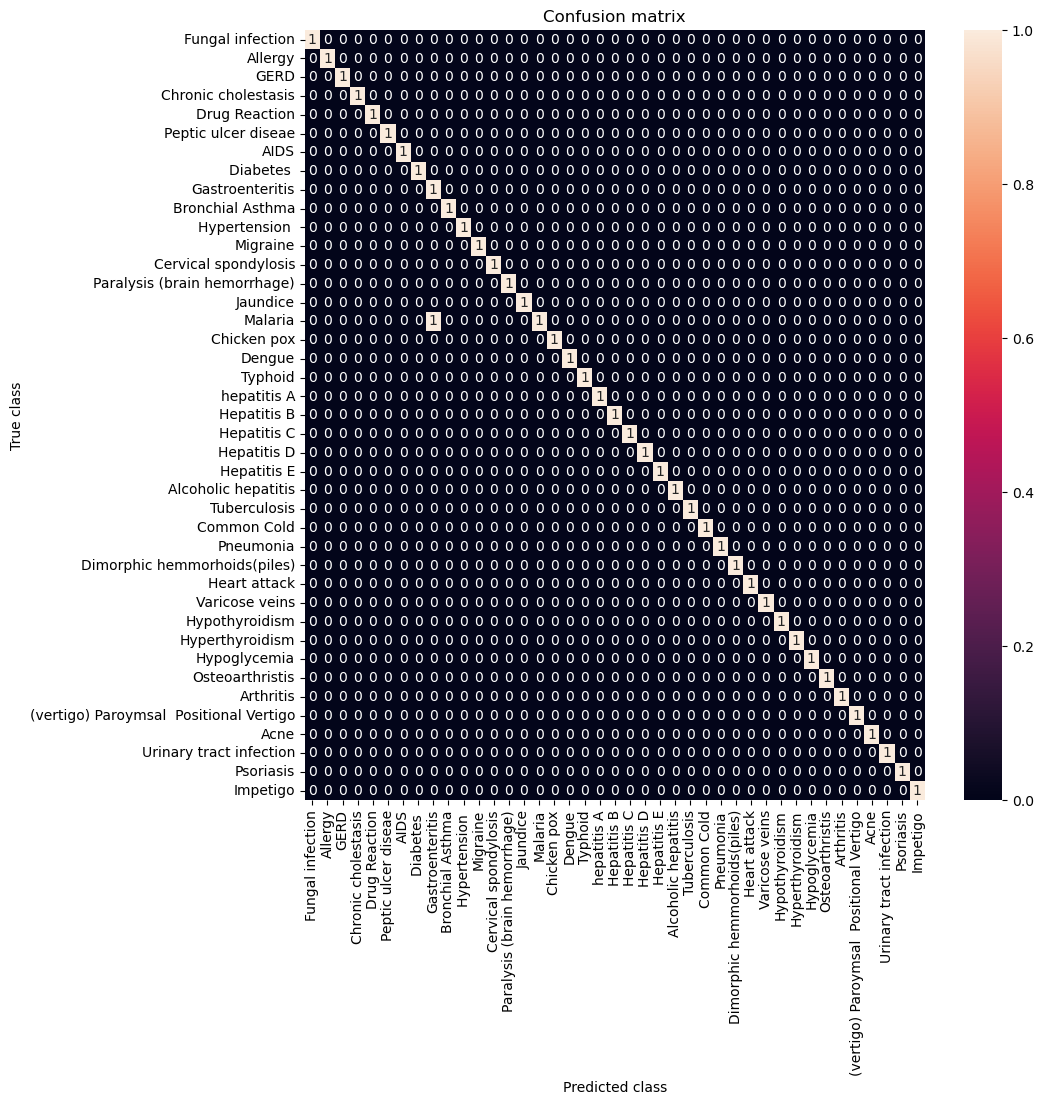

In [22]:
LABELS = [item for item in group_counts]
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(10, 10)) 
sb.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

## Applying k-Fold Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
print("Max accuracy: {:.5f} %".format(max(accuracies)*100))
print("Min accuracy: {:.5f} %".format(min(accuracies)*100))
print("Accuracy: {:.5f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.5f} %".format(accuracies.std()*100))

Max accuracy: 100.00000 %
Min accuracy: 100.00000 %
Accuracy: 100.00000 %
Standard Deviation: 0.00000 %


## PREDICTING SINGLE VALUE

In [24]:
print(train_names)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [28]:
print()
l1 = ['dark_urine']
l2 = []
l = []
i = 0
j = 0
for i in range(len(train_names)):
    if j == len(l1):
        l2.append(0)
    elif l1[j] == train_names[i]:
        l2.append(1)
        j += 1
    else:
        l2.append(0)
    i += 1
l.append(l2)
print("Symtops: ", l1)
print("Predicted Disease: ")
print(le.inverse_transform((classifier.predict(l))))


Symtops:  ['dark_urine']
Predicted Disease: 
['Jaundice']
